In [4]:
from pylab import *
import pandas as pd
from root_pandas import read_root
from RechitCalibrator import *

In [2]:
ntuple = read_root('../data/partGun_PDGid15_x1000_E300.0To300.0_NTUP_1.root','ana/hgc',
                   columns=['rechit_time','rechit_x','rechit_y','rechit_z','rechit_cluster2d',
                            'rechit_energy','rechit_layer','rechit_thickness',
                            'genpart_dvx','genpart_dvy','genpart_dvz','genpart_energy',
                            'genpart_pid','genpart_gen'
                           ]
                  )

In [4]:
rc = RecHitCalibration()
ECUT = 3

df = pd.DataFrame(columns=['l','e','x','y','z','t'])
gen = pd.DataFrame(columns=['vx','vy','vz','e','id','label'])
for index, row in ntuple.iterrows():
    
    thick = (row["rechit_thickness"]/100 - 1).astype(int)
    layer,energy = row['rechit_layer'],row['rechit_energy']

    sigmaNoise = 0.001 * rc.sigmaNoiseMeV(layer, thick) 
    aboveTreshold = (energy >= ECUT*sigmaNoise)
    
    ## 1. zside>0 ## 
    slt = (row['rechit_z']>0) & (aboveTreshold)
    df.loc[index] = [
        layer[slt],
        energy[slt],
        row['rechit_x'][slt],
        row['rechit_y'][slt],
        row['rechit_z'][slt],
        row['rechit_time'][slt]
    ]
    
    slt = row['genpart_dvz'] > 0
    gen.loc[index] = [
        row['genpart_dvx'][slt],
        row['genpart_dvy'][slt],
        row['genpart_dvz'][slt],
        row['genpart_energy'][slt],
        row['genpart_pid'][slt],
        row['genpart_gen'][slt]
    ]



In [ ]:
df.to_pickle('../data/rechits.pkl')
df.to_pickle('../data/genpart.pkl')

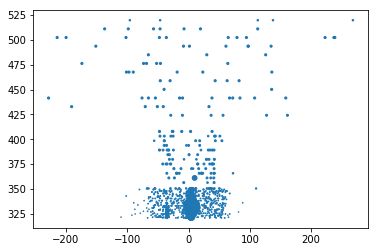

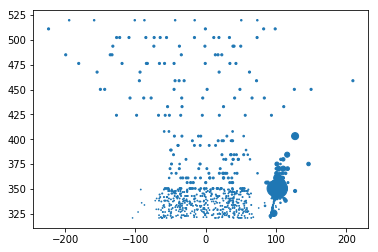

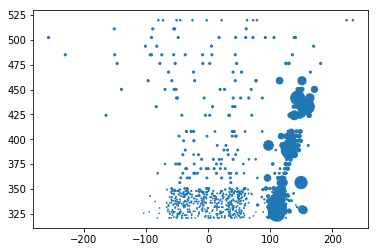

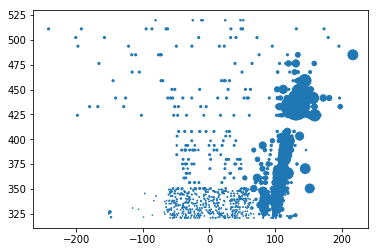

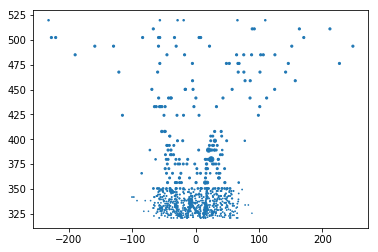

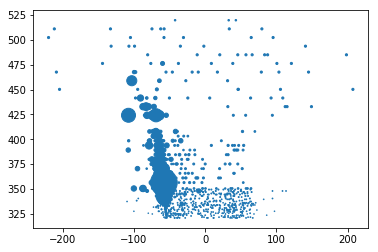

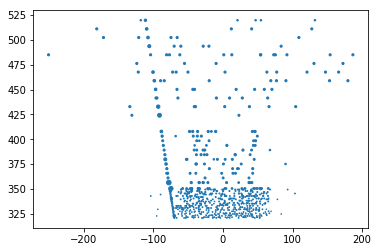

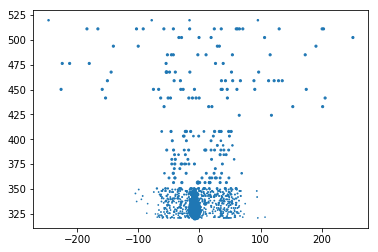

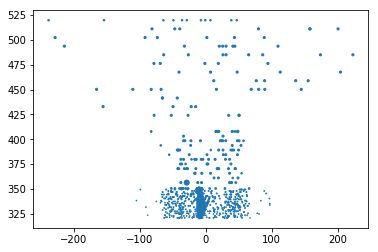

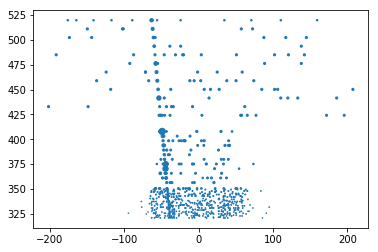

In [6]:
for idx in range(10):
    l,x,y,z,e,t = df.l[idx],df.x[idx],df.y[idx],df.z[idx],df.e[idx],df.t[idx]
    plt.figure(facecolor='w')
    plt.scatter(x,z,marker='o',s=100*e)
    

/home/zchen/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


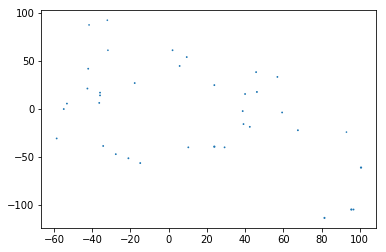

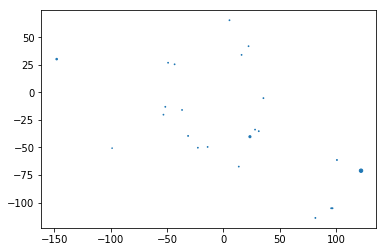

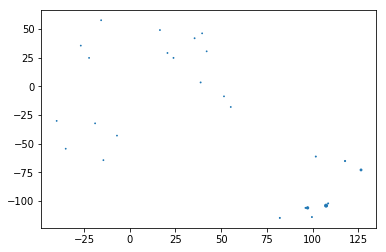

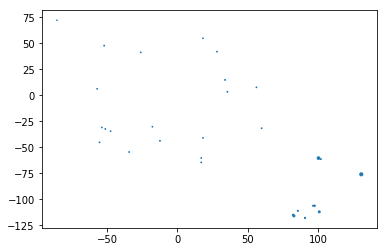

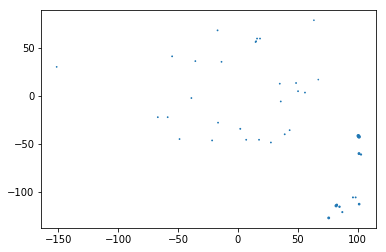

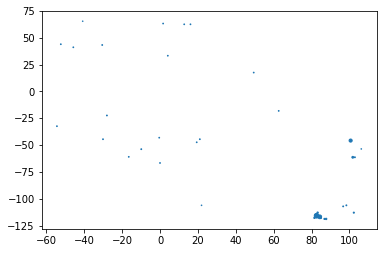

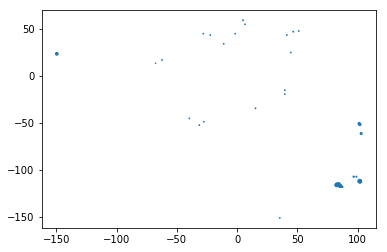

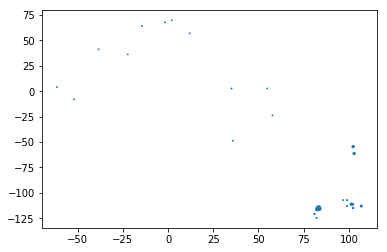

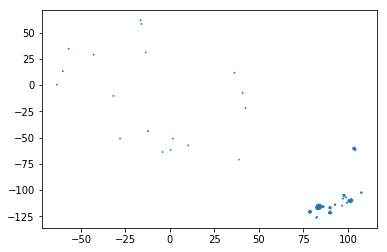

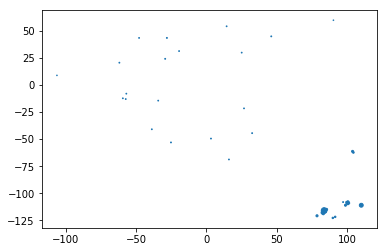

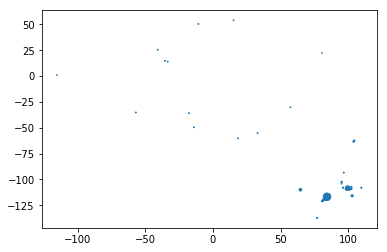

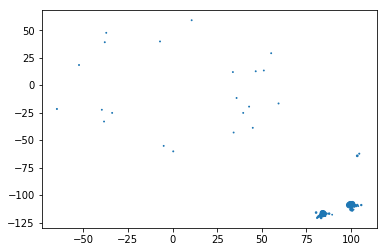

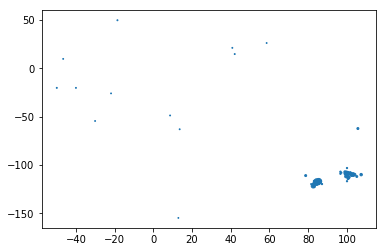

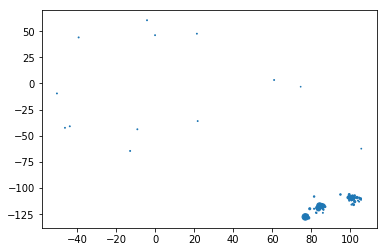

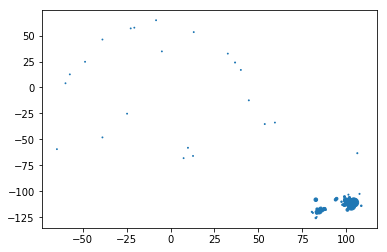

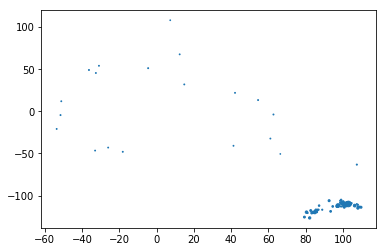

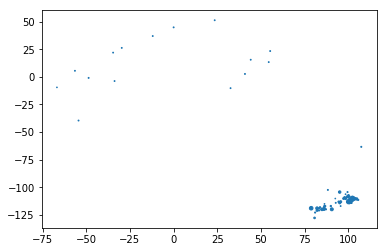

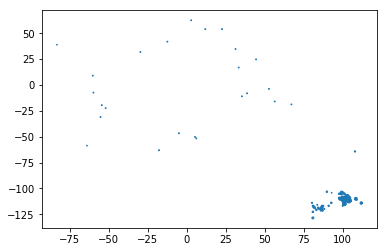

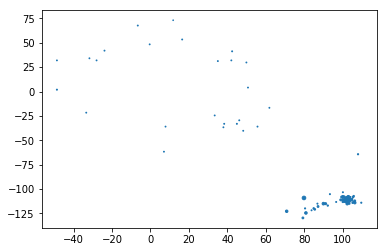

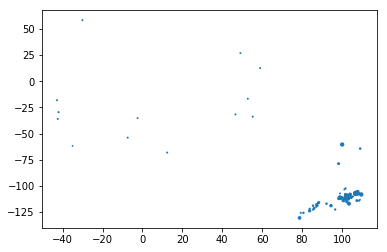

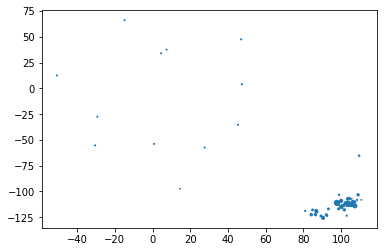

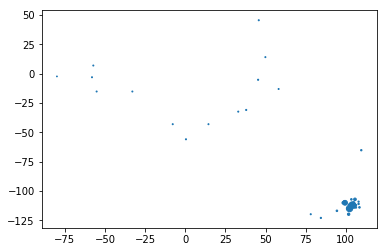

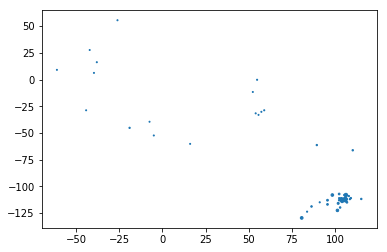

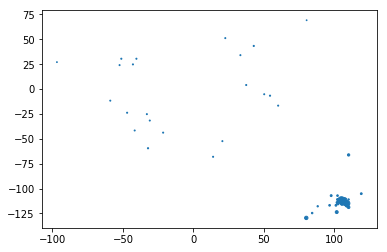

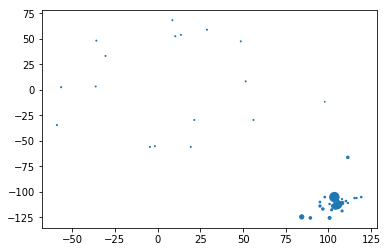

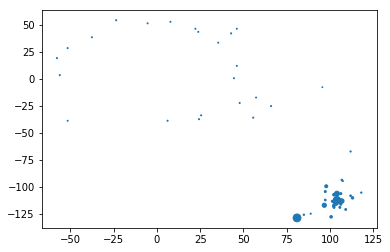

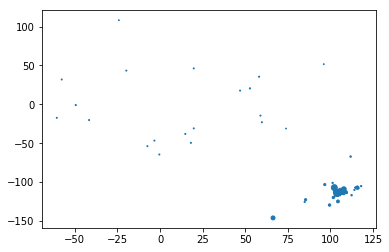

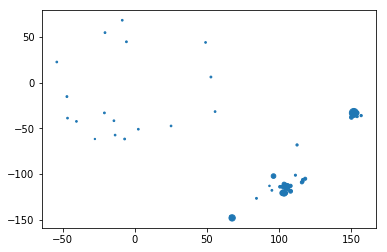

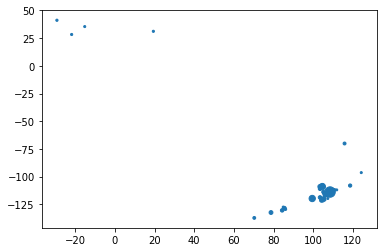

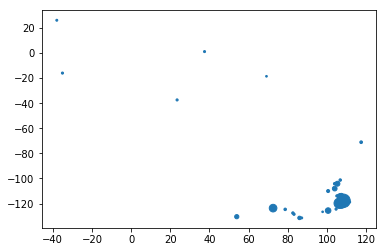

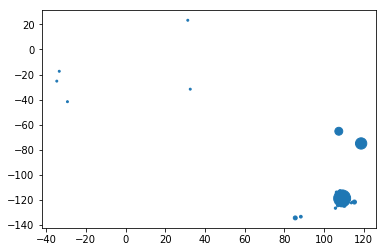

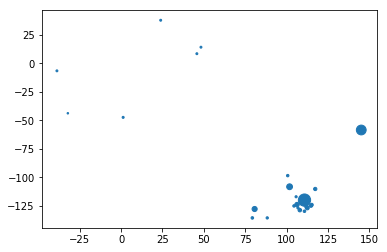

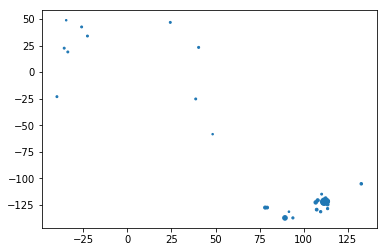

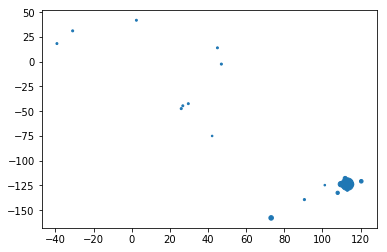

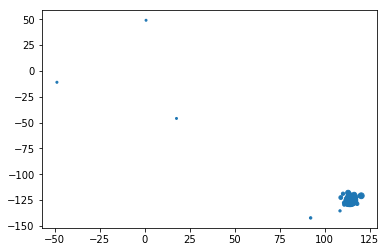

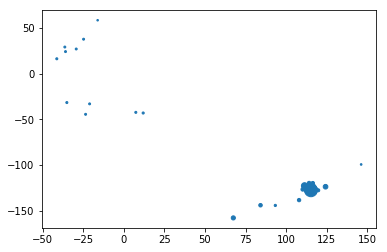

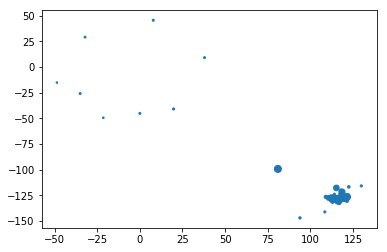

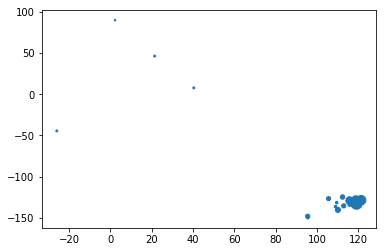

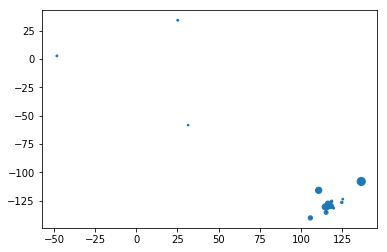

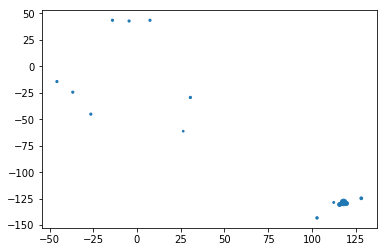

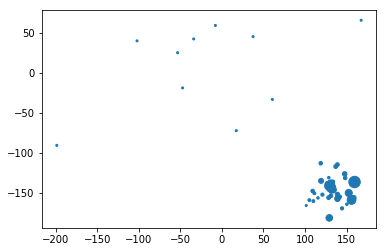

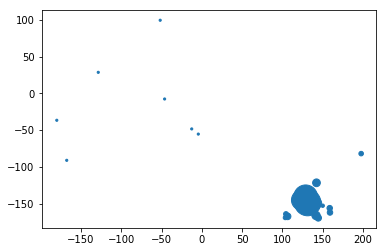

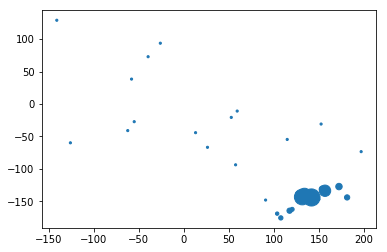

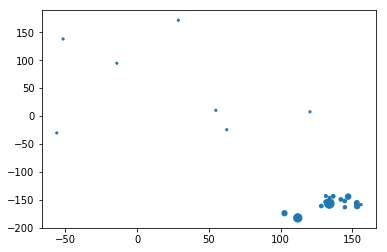

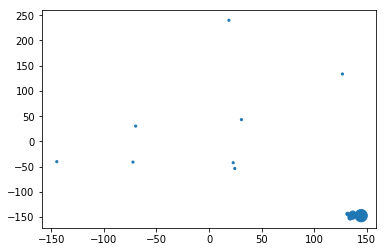

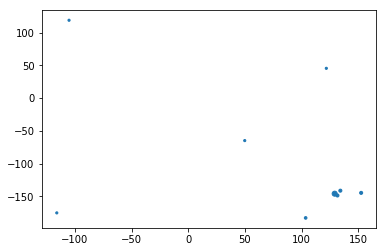

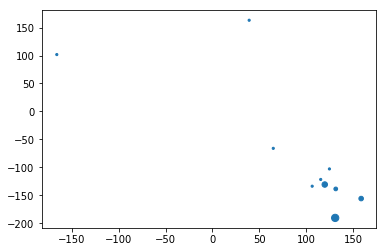

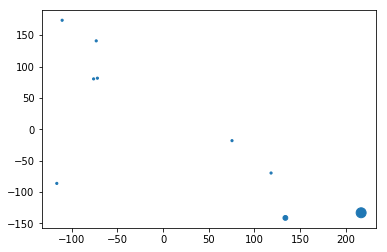

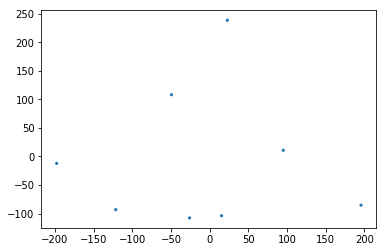

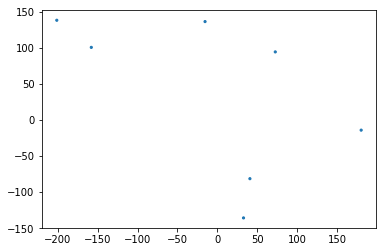

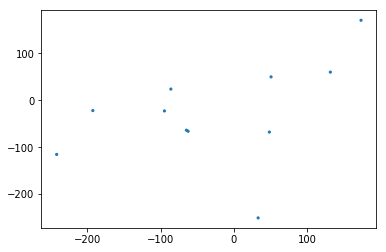

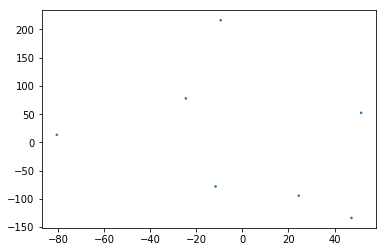

In [78]:
for ind0 in range(52):
    ind = ind0+1
    plt.figure(facecolor='w')
    plt.scatter(x[l==ind],y[l==ind],marker='o',s=100*e[l==ind])

In [69]:
gen.id[idx]

array([-211, -211,  211, 2112, -211,  211,   22], dtype=int32)

In [7]:
typeof abb !== 'undefined'

SyntaxError: invalid syntax (<ipython-input-7-932a466b2a7b>, line 1)

In [6]:
abb in nan

NameError: name 'abb' is not defined